In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----------Data cleaning and analysis----------

In [2]:
#add csv to variable
nasa_data = pd.read_csv("neo.csv")

In [3]:
nasa_data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [4]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
nasa_data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
#chek duplicate data
nasa_data.duplicated().sum()

0

In [7]:
nasa_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [8]:
#drop id column
nasa_data = nasa_data.drop(["id"], axis=1)
nasa_data.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [9]:
#decimal reductio and save in a new csv archive
nasa_data.to_csv("nasa_data.csv", float_format="%.2f")

In [10]:
nasa_clean = pd.read_csv("nasa_data.csv")

In [11]:
nasa_clean.head()

,Unnamed: 0,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,0,162635 (2000 SS164),1.20,2.68,13569.25,54839744.08,Earth,False,16.73,False
1,1,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
2,2,512244 (2015 YE18),0.72,1.61,114258.69,49798724.94,Earth,False,17.83,False
3,3,(2012 BV13),0.10,0.22,24764.30,25434972.72,Earth,False,22.20,False
4,4,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True


In [12]:
#rename column
nasa_clean = nasa_clean.rename(columns={'est_diameter_min' : 'diameter_min'})
nasa_clean = nasa_clean.rename(columns={'est_diameter_max' : 'diameter_max'})


In [13]:
nasa_clean = nasa_clean.drop(['Unnamed: 0'], axis=1)

In [14]:
nasa_clean.head()

,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.20,2.68,13569.25,54839744.08,Earth,False,16.73,False
1,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
2,512244 (2015 YE18),0.72,1.61,114258.69,49798724.94,Earth,False,17.83,False
3,(2012 BV13),0.10,0.22,24764.30,25434972.72,Earth,False,22.20,False
4,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True


--------------Data visualization--------------

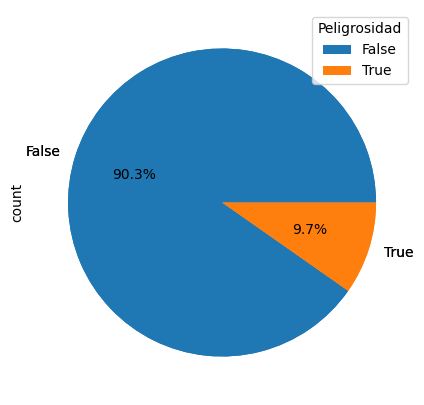

In [15]:
#pie chart % hazardous
hazard = nasa_clean["hazardous"].value_counts()
plt.figure(figsize=(5,5))
hazard.plot.pie()
plt.rcParams['font.size'] = 10
hazard.plot.pie(autopct='%1.1f%%')
plt.legend(hazard.index, title="Peligrosidad", loc="upper right")
plt.show()

we can see that only the 9.7% of every asteroid are hazardous for the earth, I think this is a good % for us, don't you think?

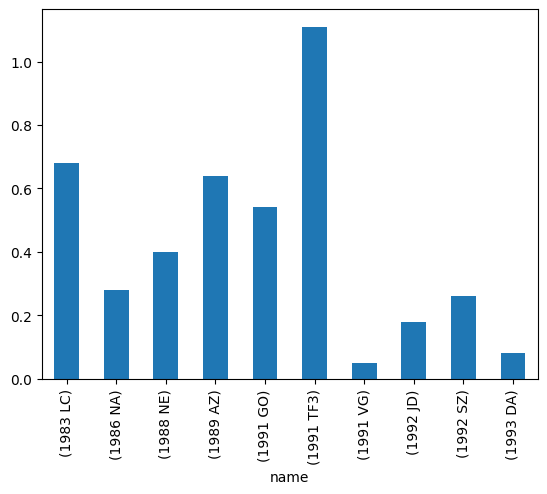

In [16]:
#comparison of the minimum diameter of the objects by names
name_min_diameter = nasa_clean.groupby('name')['diameter_min'].sum().head(10)
name_min_diameter.plot(kind='bar', xticks=range(len(name_min_diameter)), rot=0)
plt.xticks(range(len(name_min_diameter)), name_min_diameter.index)
plt.xticks(rotation=90)
plt.show()

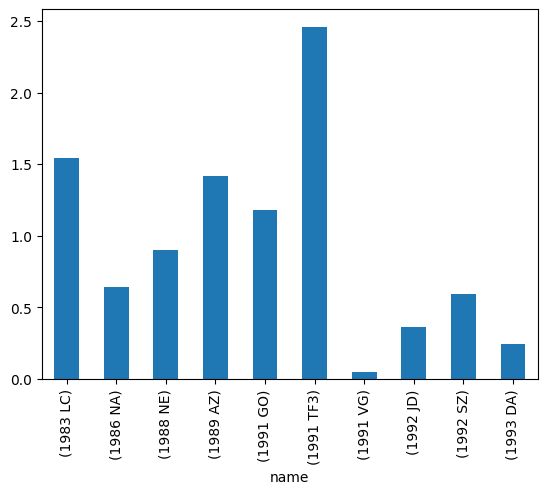

In [17]:
#comparison of the maximum diameter of the objects by names
name_max_diameter = nasa_clean.groupby('name')['diameter_max'].sum().head(10)
name_max_diameter.plot(kind='bar', xticks=range(len(name_max_diameter)), rot=0)
plt.xticks(range(len(name_max_diameter)), name_max_diameter.index)
plt.xticks(rotation=90)
plt.show()

In [18]:
#check if there are different types of orbits and if so how many
orbit_body = nasa_clean['orbiting_body'].value_counts()
orbit_body.head()

orbiting_body
Earth    90836
Name: count, dtype: int64

In [19]:
sentry = nasa_clean['sentry_object'].value_counts()
sentry.head()

sentry_object
False    90836
Name: count, dtype: int64

In [20]:
nasa_clean.head()

,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,162635 (2000 SS164),1.20,2.68,13569.25,54839744.08,Earth,False,16.73,False
1,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
2,512244 (2015 YE18),0.72,1.61,114258.69,49798724.94,Earth,False,17.83,False
3,(2012 BV13),0.10,0.22,24764.30,25434972.72,Earth,False,22.20,False
4,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2019 EJ3)'),
  Text(1, 0, '(A/2019 Q2)'),
  Text(2, 0, '(2020 BZ12)'),
  Text(3, 0, '(2017 UR52)'),
  Text(4, 0, '(2018 JD2)'),
  Text(5, 0, '(2013 YC)'),
  Text(6, 0, '(2005 BW1)'),
  Text(7, 0, '(2000 LK)'),
  Text(8, 0, '612162 (2000 LK)'),
  Text(9, 0, '(2017 AF5)')])

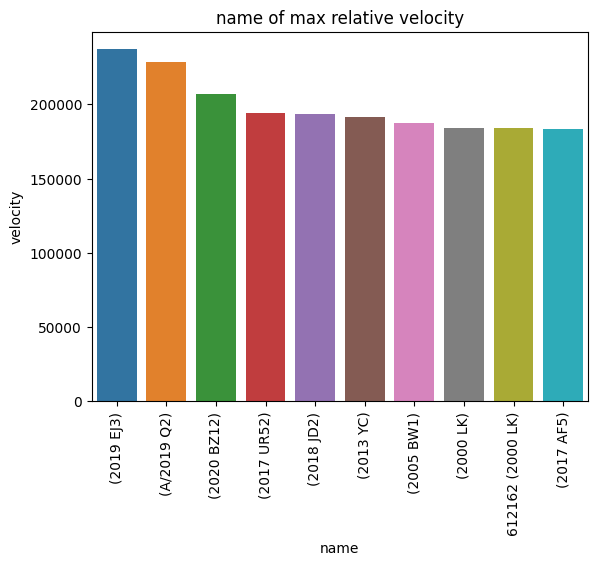

In [21]:
#compare the relative velocities of the objects by name
velocity_name = nasa_clean.nlargest(10, ['relative_velocity']).set_index('name')['relative_velocity']
sns.barplot(x=velocity_name.index, y=velocity_name)
plt.title('name of max relative velocity')
plt.xlabel('name')
plt.ylabel('velocity')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2014 XD8)'),
  Text(1, 0, '(1995 HM)'),
  Text(2, 0, '495316 (2014 GD45)'),
  Text(3, 0, '(2002 AB2)'),
  Text(4, 0, '(2013 JE29)'),
  Text(5, 0, '(2021 FQ1)'),
  Text(6, 0, '152561 (1991 RB)'),
  Text(7, 0, '(2020 MB1)'),
  Text(8, 0, '(2013 NX23)'),
  Text(9, 0, '(2000 EB14)')])

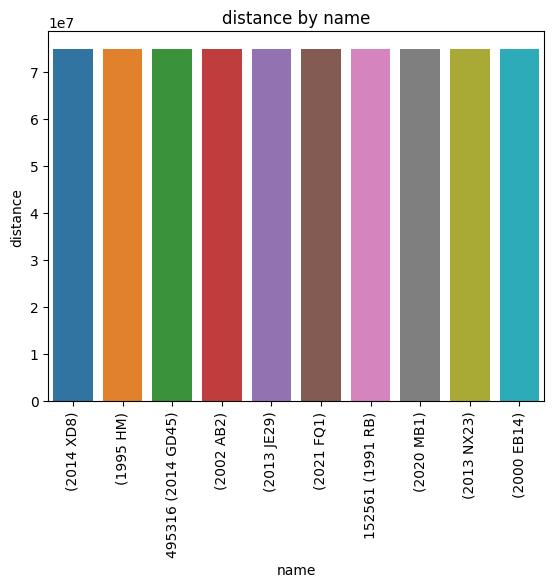

In [22]:
#compare which object has the greatest missing distance by name
distance_name = nasa_clean.nlargest(10, ['miss_distance']).set_index('name')['miss_distance']
sns.barplot(x=distance_name.index, y=distance_name)
plt.title('distance by name')
plt.xlabel('name')
plt.ylabel('distance')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(2008 TS26)'),
  Text(1, 0, '(2021 BO)'),
  Text(2, 0, '(2020 CW)'),
  Text(3, 0, '(2019 AS5)'),
  Text(4, 0, '(2011 CQ1)'),
  Text(5, 0, '(2008 UM1)'),
  Text(6, 0, '(2019 UN13)'),
  Text(7, 0, '(2017 UL6)')])

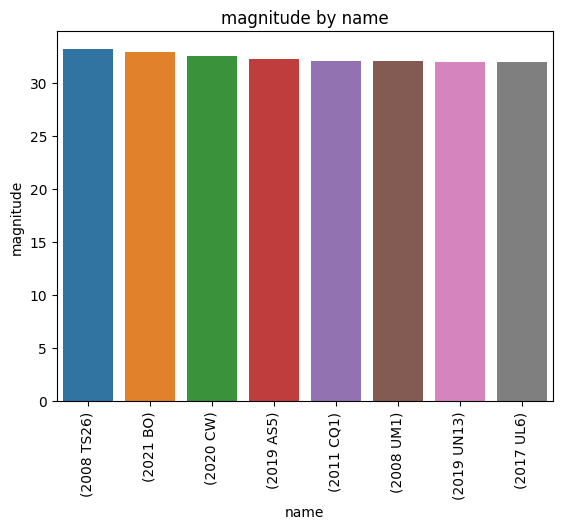

In [23]:
#comparisons of magnitudes of objects by name
magnitud_name = nasa_clean.nlargest(50, ['absolute_magnitude']).set_index('name')['absolute_magnitude']
sns.barplot(x=magnitud_name.index, y=magnitud_name)
plt.title('magnitude by name')
plt.xlabel('name')
plt.ylabel('magnitude')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '0.18'),
  Text(1, 0, '0.24'),
  Text(2, 0, '0.25'),
  Text(3, 0, '0.26'),
  Text(4, 0, '0.33'),
  Text(5, 0, '0.34'),
  Text(6, 0, '0.36'),
  Text(7, 0, '0.39'),
  Text(8, 0, '0.47'),
  Text(9, 0, '0.49'),
  Text(10, 0, '0.58'),
  Text(11, 0, '0.59'),
  Text(12, 0, '0.62'),
  Text(13, 0, '0.65'),
  Text(14, 0, '0.68'),
  Text(15, 0, '0.71'),
  Text(16, 0, '0.75'),
  Text(17, 0, '0.86'),
  Text(18, 0, '0.9'),
  Text(19, 0, '0.94'),
  Text(20, 0, '0.99'),
  Text(21, 0, '1.09'),
  Text(22, 0, '1.16'),
  Text(23, 0, '1.22'),
  Text(24, 0, '1.3'),
  Text(25, 0, '1.34'),
  Text(26, 0, '1.36'),
  Text(27, 0, '1.38'),
  Text(28, 0, '1.64'),
  Text(29, 0, '1.65'),
  Text(30, 0, '1.92'),
  Text(31, 0, '1.96'),
  Text(32, 0, '3.13'),
  Text(33, 0, '3.42'),
  Text(34, 0, '4.25'),
  Text(35, 0, '4.61')])

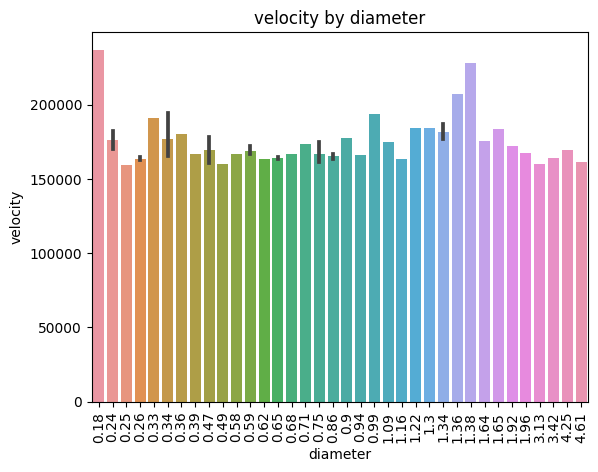

In [24]:
#comparison of relative velocity by diameter
diametermax_velocity = nasa_clean.nlargest(50, ['relative_velocity']).set_index('diameter_max')['relative_velocity']
sns.barplot(x=diametermax_velocity.index, y=diametermax_velocity)
plt.title('velocity by diameter')
plt.xlabel('diameter')
plt.ylabel('velocity')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.02'),
  Text(2, 0, '0.03'),
  Text(3, 0, '0.05'),
  Text(4, 0, '0.06'),
  Text(5, 0, '0.07'),
  Text(6, 0, '0.08'),
  Text(7, 0, '0.11'),
  Text(8, 0, '0.12'),
  Text(9, 0, '0.13'),
  Text(10, 0, '0.15'),
  Text(11, 0, '0.2'),
  Text(12, 0, '0.23'),
  Text(13, 0, '0.26'),
  Text(14, 0, '0.27'),
  Text(15, 0, '0.28'),
  Text(16, 0, '0.3'),
  Text(17, 0, '0.36'),
  Text(18, 0, '0.38'),
  Text(19, 0, '0.41'),
  Text(20, 0, '0.44'),
  Text(21, 0, '0.47'),
  Text(22, 0, '0.49'),
  Text(23, 0, '0.52'),
  Text(24, 0, '0.55'),
  Text(25, 0, '0.73'),
  Text(26, 0, '0.8'),
  Text(27, 0, '0.82'),
  Text(28, 0, '0.88'),
  Text(29, 0, '0.9'),
  Text(30, 0, '0.99'),
  Text(31, 0, '1.06'),
  Text(32, 0, '1.13'),
  Text(33, 0, '1.32'),
  Text(34, 0, '1.74')])

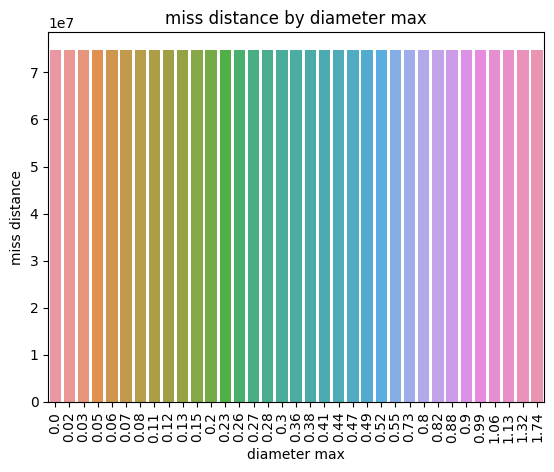

In [25]:
#comparison of miss distance by maximum diameter
diametermax_miss = nasa_clean.nlargest(50, ['miss_distance']).set_index('diameter_max')['miss_distance']
sns.barplot(x=diametermax_miss.index, y=diametermax_miss)
plt.title('miss distance by diameter max')
plt.xlabel('diameter max')
plt.ylabel('miss distance')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.02'),
  Text(3, 0, '0.03'),
  Text(4, 0, '0.04'),
  Text(5, 0, '0.05'),
  Text(6, 0, '0.06'),
  Text(7, 0, '0.07'),
  Text(8, 0, '0.09'),
  Text(9, 0, '0.1'),
  Text(10, 0, '0.12'),
  Text(11, 0, '0.13'),
  Text(12, 0, '0.16'),
  Text(13, 0, '0.17'),
  Text(14, 0, '0.18'),
  Text(15, 0, '0.19'),
  Text(16, 0, '0.2'),
  Text(17, 0, '0.21'),
  Text(18, 0, '0.22'),
  Text(19, 0, '0.23'),
  Text(20, 0, '0.25'),
  Text(21, 0, '0.33'),
  Text(22, 0, '0.36'),
  Text(23, 0, '0.37'),
  Text(24, 0, '0.39'),
  Text(25, 0, '0.4'),
  Text(26, 0, '0.44'),
  Text(27, 0, '0.47'),
  Text(28, 0, '0.51'),
  Text(29, 0, '0.59'),
  Text(30, 0, '0.78')])

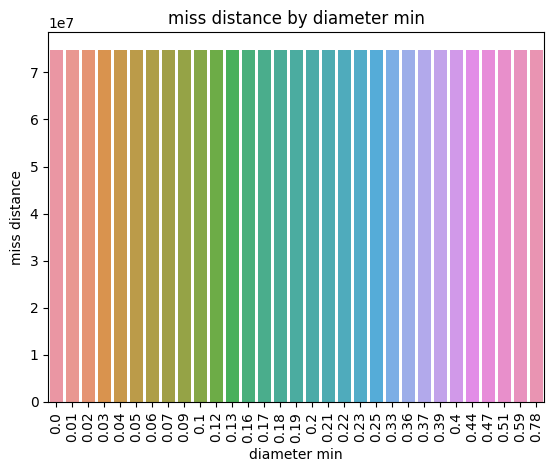

In [26]:
#comparison of miss distance by minimum diameter
diametermin_miss = nasa_clean.nlargest(50, ['miss_distance']).set_index('diameter_min')['miss_distance']
sns.barplot(x=diametermin_miss.index, y=diametermin_miss)
plt.title('miss distance by diameter min')
plt.xlabel('diameter min')
plt.ylabel('miss distance')
plt.xticks(rotation=90)

¿WHAT IS IT THAT MAKES THEM DANGEROUS COMPARED TO THOSE THAT ARE NOT? 

LET'S TRY TO DETERMINE IT, EVEN IF IT IS IN A SIMPLE WAY.

c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


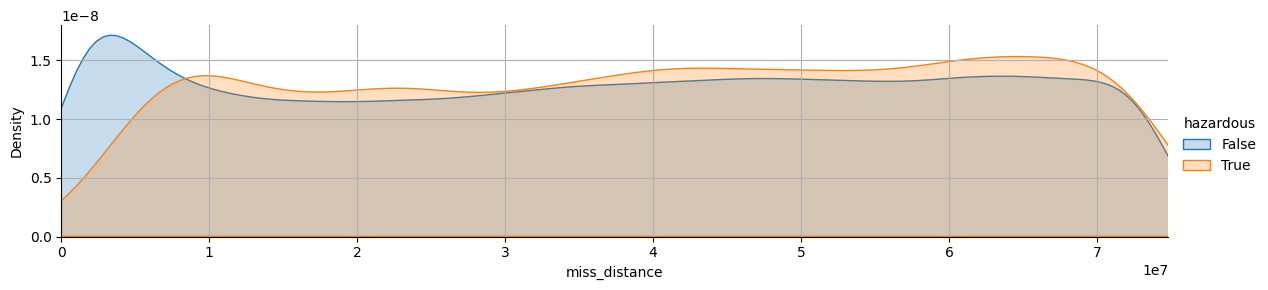

In [27]:
#relation of distribution of hazardous by miss distance
facet = sns.FacetGrid(nasa_clean, hue="hazardous", aspect = 4)
facet.map(sns.kdeplot, 'miss_distance', shade=True)
facet.set(xlim=(0, nasa_clean['miss_distance'].max()))
plt.grid(True)
facet.add_legend()



Here we can see that the objects that are not dangerous (False) have a high degree of density and contain a relatively smaller failure distance compared to those that are dangerous (True), but it is only at the beginning because as we can see a common average is established between them.

We can determine that in the case of the non-hazardous ones, they have a higher density in some cases and in them there is a smaller failure distance, so we can take it as a greater proximity? if that were the case, having higher density will occupy more volume in the orbit of the earth, making the space debris that travels around the earth can reduce its speed, making it less dangerous without taking into account that on the way to enter the planet, it must pass through the different atmospheres that will wear it out.

On the other hand, those that are dangerous, we can observe that they start with a lower density, therefore their speed will not be as affected as with those of higher density, causing it to increase, but at the same time, having lower density, the danger is not as high. As the failure distance increases, the density also increases, so although there is a higher probability that it will not hit, the mere fact of having those chances makes it more dangerous since its speed and density will increase, thus reducing the failure distance.

c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


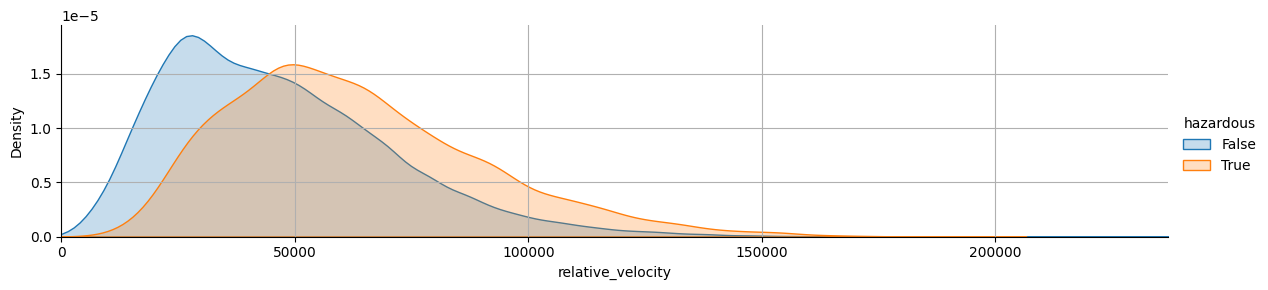

In [28]:
#relation of distribution of hazardous by relative velocity
facet1 = sns.FacetGrid(nasa_clean, hue="hazardous", aspect = 4)
facet1.map(sns.kdeplot, 'relative_velocity', shade=True)
facet1.set(xlim=(0, nasa_clean['relative_velocity'].max()))
plt.grid(True)
facet1.add_legend()

We can see that the speed increases as the density decreases, those that are dangerous maintain a higher density for a longer time, we could even say that they have a tendency to have a density above 0.5.

If we compare the density and speed of those that are not dangerous, in this case although there is a higher density, it decreases quickly but also maintains a trend of density of 0.5 but a lower speed, so these have a higher probability that their path can be modified by objects of higher speed and slow down their speed to be more dense.

c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


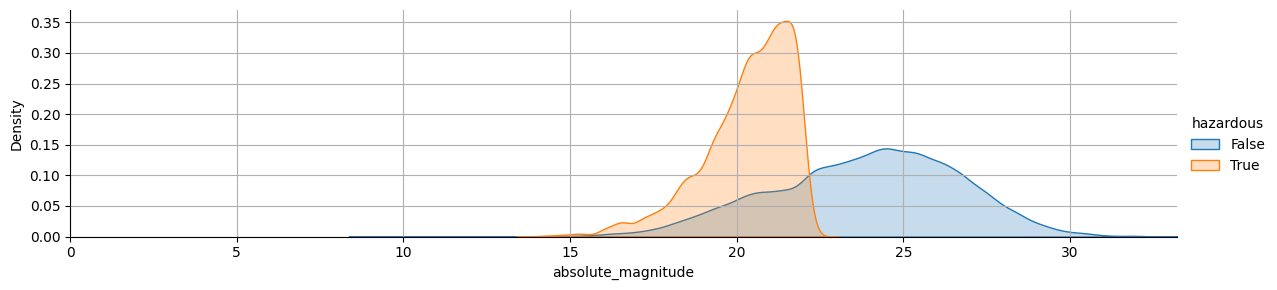

In [29]:
#relation of distribution of hazardous by absolute magnitude
facet2 = sns.FacetGrid(nasa_clean, hue="hazardous", aspect = 4)
facet2.map(sns.kdeplot, 'absolute_magnitude', shade=True)
facet2.set(xlim=(0, nasa_clean['absolute_magnitude'].max()))
plt.grid(True)
facet2.add_legend()

The absolute magnitude indicates how bright the object is, so it is not directly related to its dangerousness, but we can observe in this case that dangerous objects (True) present a higher absolute magnitude, making them much brighter compared to those that are not dangerous (False). This does not mean that by being brighter or brighter the object can be really dangerous. It is simply one more quality to take into account.

c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


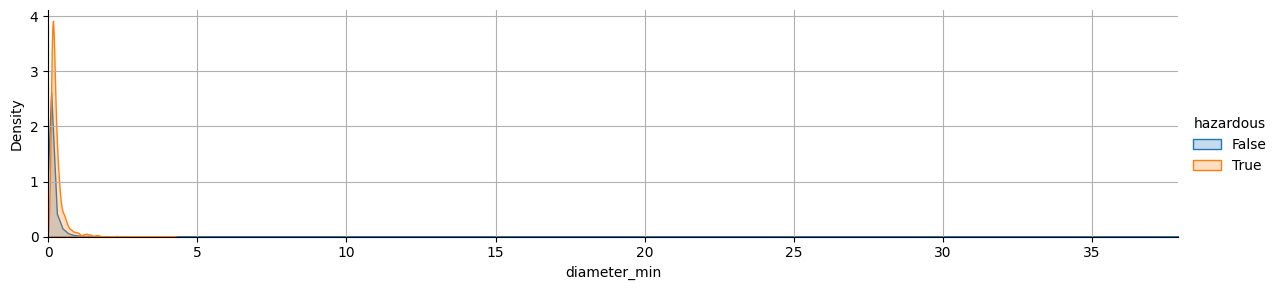

In [30]:
#relation of distribution of hazardous by diameter minimum
facet2 = sns.FacetGrid(nasa_clean, hue="hazardous", aspect = 4)
facet2.map(sns.kdeplot, 'diameter_min', shade=True)
facet2.set(xlim=(0, nasa_clean['diameter_min'].max()))
plt.grid(True)
facet2.add_legend()

We can observe that the objects that are really dangerous have a much larger minimum diameter compared to those that are not (False).

c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Brai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


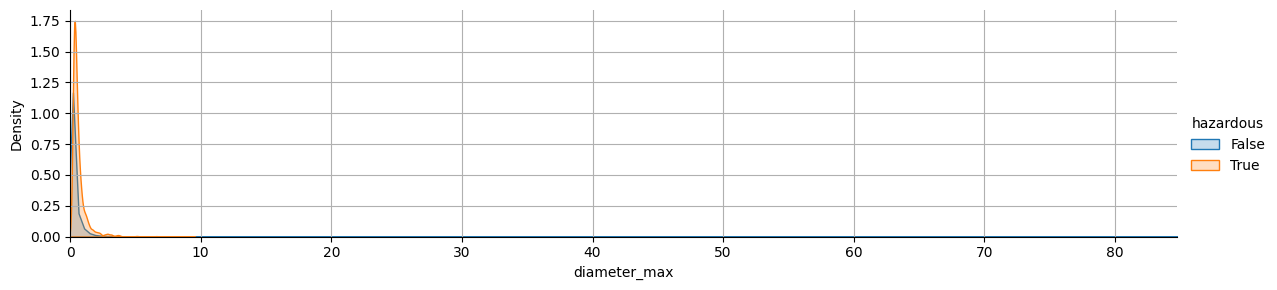

In [31]:
#relation of distribution of hazardous by diameter maximum
facet2 = sns.FacetGrid(nasa_clean, hue="hazardous", aspect = 4)
facet2.map(sns.kdeplot, 'diameter_max', shade=True)
facet2.set(xlim=(0, nasa_clean['diameter_max'].max()))
plt.grid(True)
facet2.add_legend()

Here we can also observe that the maximum diameter of the dangerous objects (True) continue to exceed those objects that are not (False) demonstrating again the reason why they are classified in this way.

In [32]:
#We filter the table by objects that are only dangerous (True) in order to make graphs focused only on them.
nasa_fill = nasa_clean[nasa_clean['hazardous'] == True]
nasa_fill

,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
1,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
4,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True
10,(2020 OT6),0.25,0.56,58430.70,38337496.95,Earth,False,20.11,True
23,506491 (2003 UW29),0.20,0.45,115899.18,15101017.14,Earth,False,20.60,True
27,(2017 RV),0.11,0.25,48655.31,32797747.23,Earth,False,21.90,True
...,...,...,...,...,...,...,...,...,...
90782,(2017 NH),0.13,0.30,67595.76,56810590.64,Earth,False,21.50,True
90794,(2022 AY1),0.10,0.23,51149.70,54500015.86,Earth,False,22.02,True
90811,138404 (2000 HA24),0.36,0.80,33008.62,71898350.23,Earth,False,19.36,True
90812,377732 (2005 XJ8),1.03,2.31,53362.80,47566265.30,Earth,False,17.05,True


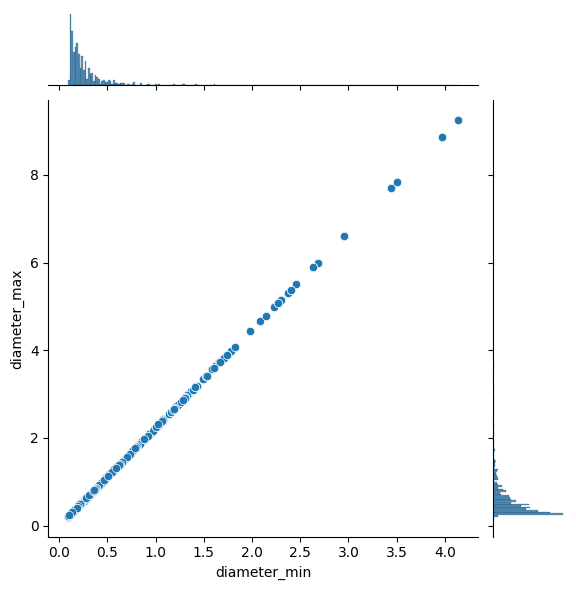

In [33]:
#we get the intensity of relationship between 2 variables
sns.jointplot(x='diameter_min', y='diameter_max', data=nasa_fill)

We can observe that maximum and minimum diameters have a higher intensity ratio below 4 and 2. Therefore, most of the dangerous objects are found in a common maximum diameter of 4 and minimum of 2.

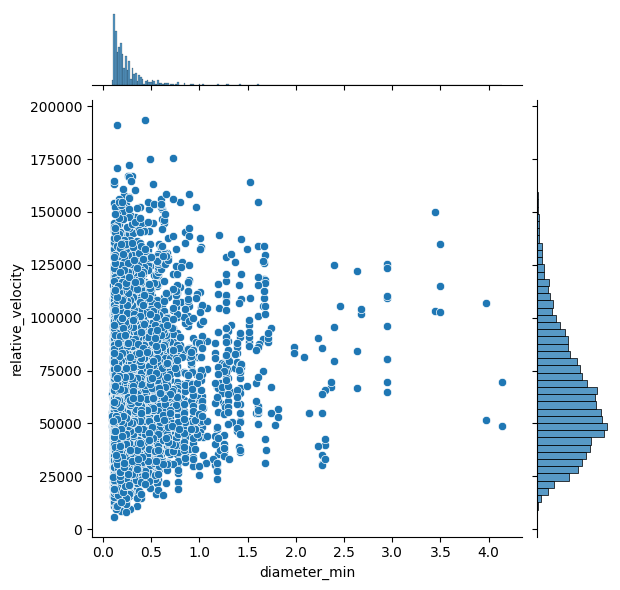

In [36]:
#intensity of relationship between minimum diameter and relative velocity
sns.jointplot(x='diameter_min', y='relative_velocity', data=nasa_fill)

The ratio of the relative velocity and the minimum diameter is established between [150,000 above 0] and between [0 above 1.25/1.5]

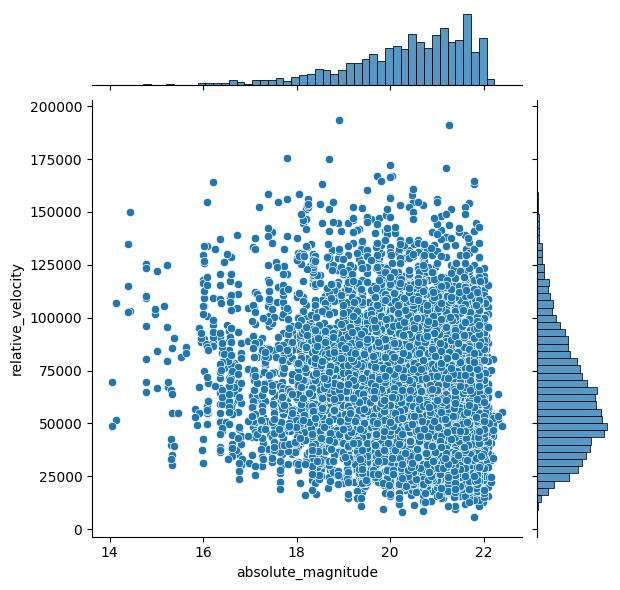

In [37]:
#intensity of relationship between maximum diameter and relative velocity
sns.jointplot(x='absolute_magnitude', y='relative_velocity', data=nasa_fill)

In this case the absolute magnitude and relative velocity maintain a strong relationship between [17 and 22] and [25000 and 130000].

In [38]:
nasa_fill.head()

,name,diameter_min,diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
1,277475 (2005 WK4),0.27,0.59,73588.73,61438126.52,Earth,False,20.00,True
4,(2014 GE35),0.26,0.57,42737.73,46275567.00,Earth,False,20.09,True
10,(2020 OT6),0.25,0.56,58430.70,38337496.95,Earth,False,20.11,True
23,506491 (2003 UW29),0.20,0.45,115899.18,15101017.14,Earth,False,20.60,True
27,(2017 RV),0.11,0.25,48655.31,32797747.23,Earth,False,21.90,True


C:\Users\Brai\AppData\Local\Temp\ipykernel_7504\1394507401.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nasa_fill['relative_velocity'], shade=True)


Text(0, 0.5, 'distribution')

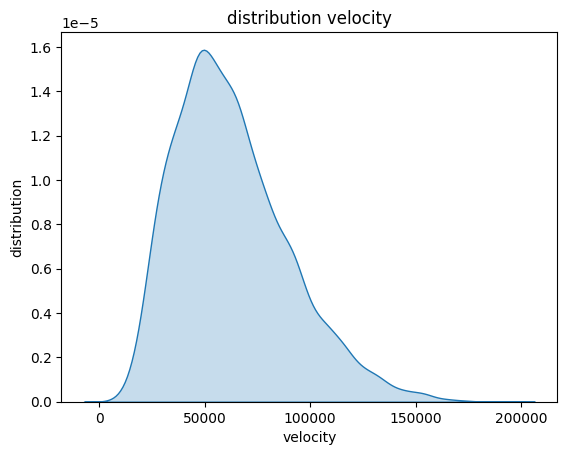

In [40]:
#distribution of realative velocity
sns.kdeplot(nasa_fill['relative_velocity'], shade=True)
plt.title('distribution velocity')
plt.xlabel('velocity')
plt.ylabel('distribution')

C:\Users\Brai\AppData\Local\Temp\ipykernel_7504\559261572.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nasa_fill['diameter_min'], shade=True)


Text(0, 0.5, 'distribution')

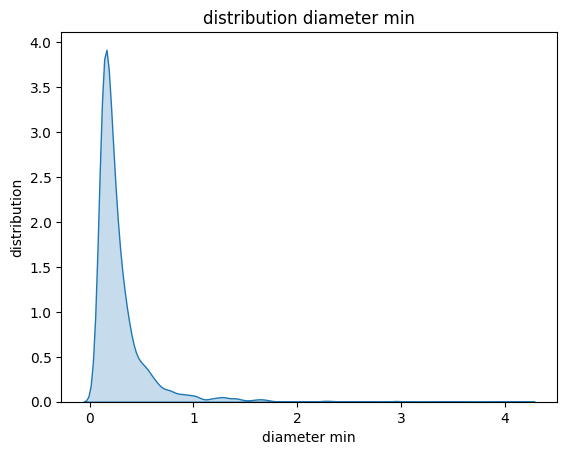

In [41]:
#distribution of diameter minimum
sns.kdeplot(nasa_fill['diameter_min'], shade=True)
plt.title('distribution diameter min')
plt.xlabel('diameter min')
plt.ylabel('distribution')

C:\Users\Brai\AppData\Local\Temp\ipykernel_7504\883720769.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nasa_fill['diameter_max'], shade=True)


Text(0, 0.5, 'distribution')

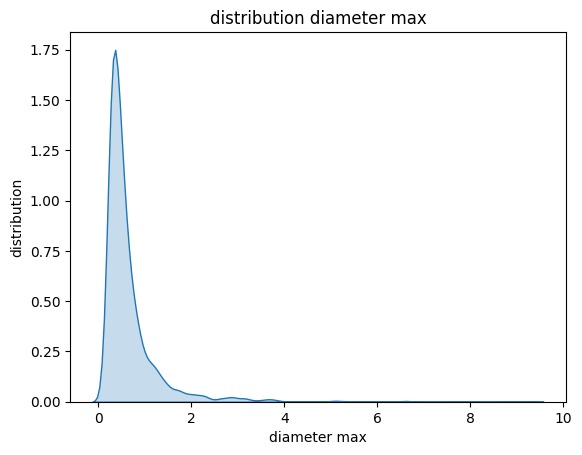

In [42]:
#distribution of diameter maximum
sns.kdeplot(nasa_fill['diameter_max'], shade=True)
plt.title('distribution diameter max')
plt.xlabel('diameter max')
plt.ylabel('distribution')

[]

<Figure size 1500x1000 with 0 Axes>

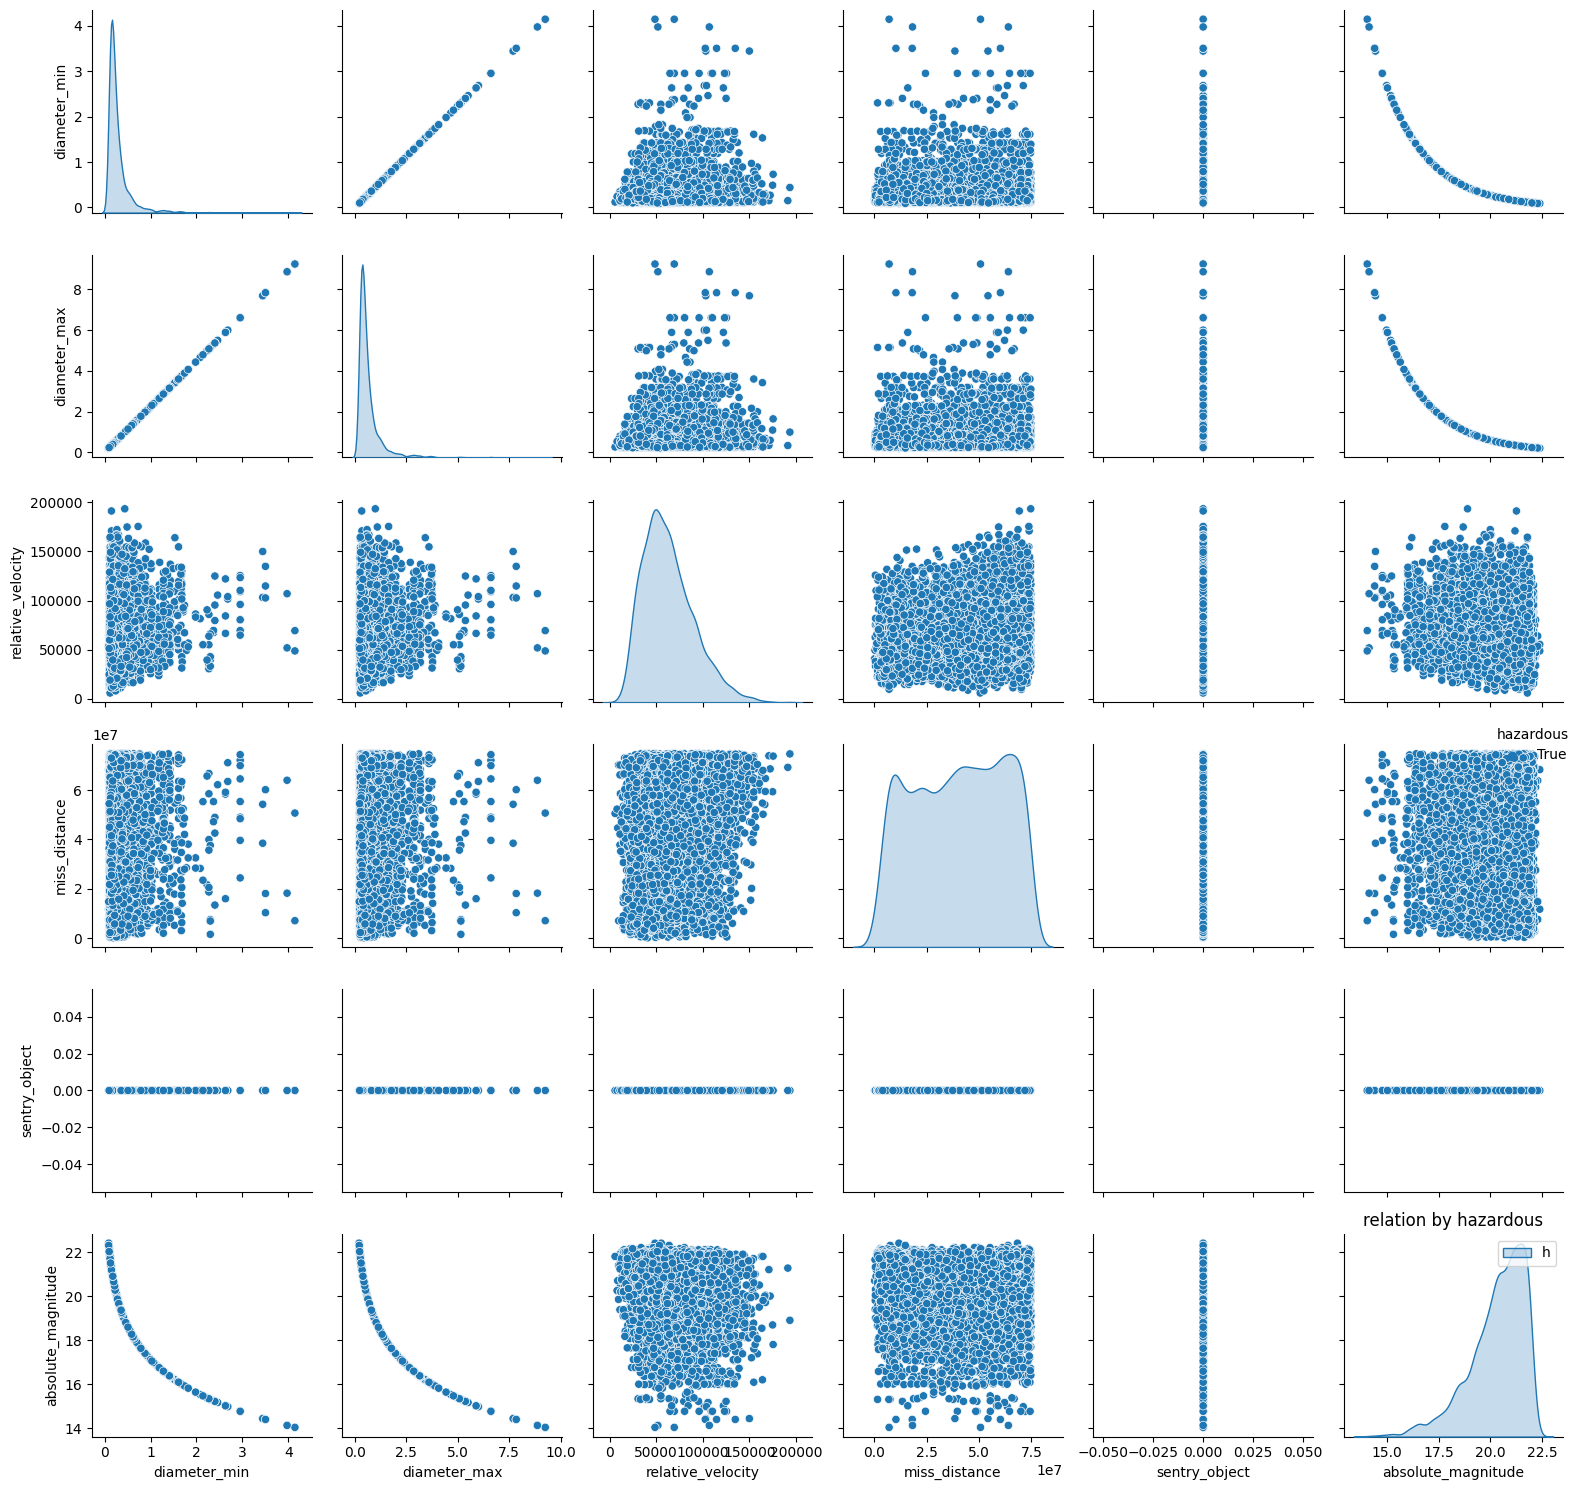

In [43]:
#pairplot graph to explore the relationships between multiple variables within the data we have on hazardous and non-hazardous objects.
plt.figure(figsize=(15,10))
sns.pairplot(nasa_fill, hue='hazardous')
plt.title("relation by hazardous")
plt.legend('hazardous')
plt.tight_layout()
plt.plot()

After analyzing the data representing the objects orbiting close to the earth, analyzing and comparing the reason why the dangerous ones are qualified in that way, we can answer the question we asked before.

WHAT IS IT THAT MAKES THEM DANGEROUS COMPARED TO THOSE THAT ARE NOT?

By analyzing the graphs on the different data that we have that allows us to observe and buy why the dangerous objects are qualified in that way, we can determine that it is taken into account of 4 data that highlight them only 3 are important to determine their dangerousness

Diameter, relative velocity, failure distance and absolute magnitude. This last one is not related to the dangerousness of the object, but to its brightness, therefore it is a data that we can discard.

In this case, once we have filtered the data that will indicate the dangerousness and after observing the graphs, we can conclude that the objects that were classified as dangerous, compared to those that are not. They have a higher minimum and maximum diameter, this directly influences the relative speed of these objects and the distance of failure, in addition to possessing a minimum diameter greater than those that are not dangerous implies that its speed can be reduced and its trajectory as well, producing that if for some factor this object began to fall to earth the risk would be greater.

Compared to those objects which are not dangerous, their maximum and minimum diameters are rarely more than half the minimum and maximum diameters of dangerous objects.

Therefore, in conclusion, the objects classified as dangerous are so because their maximum and minimum diameters exceed the normal standard and, in turn, because they have a greater failure distance and a greater relative velocity in some cases, even if they have a large failure distance, the mere fact that this failure distance can be reduced over time makes them more and more dangerous. It is better that they have a very low diameter and a low failure distance, since the risk involved would be minimal, than that they have a relatively large diameter and the failure distance begins to reduce as this object begins to approach the planet.